In [1]:
# Reads in the results file
# graphs different metrics using micro accuracy as color

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import utils


"""
NOTE: keep patience and min_pct_improvement at 5, 1 for purposes of comparison

Results of the first arch search, 2427 models explored:
- all other val metrics could be perfect and you could still get as low as 90% micro val accuracy

- 1 to 2 layers, BUT was affected by bias: more layers = more chance to get an invalid combination of hyperparameters, so many fewer 4-layer models than 1-layer models were evaluated. Regardless, as pie graphs go from all models to higher performing models, the percent of 1 and 2 layer models increased, while 3 and 4 decreased.
- dropout of 0-0.6 (the range of given values) was all high performing
- stride was 1 80% of the time for highest models on layer 1, rarely 2, never 3. On layer 2, it was 50/50 stride 1 or 2.
- kernel size was mostly 5-9, sometimes 11, not too often 3
- pooling kernel size ranged across all given values, 0-3
- output channels were mostly large, 128 and 256, 
- batch size was mostly 16 or 32, but 64 was not uncommon

next steps:
- raise conv channels range and make more granular, [5, 6, 7, 8, 9]
"""

KeyboardInterrupt: 

MEAN: 63.90233545647558


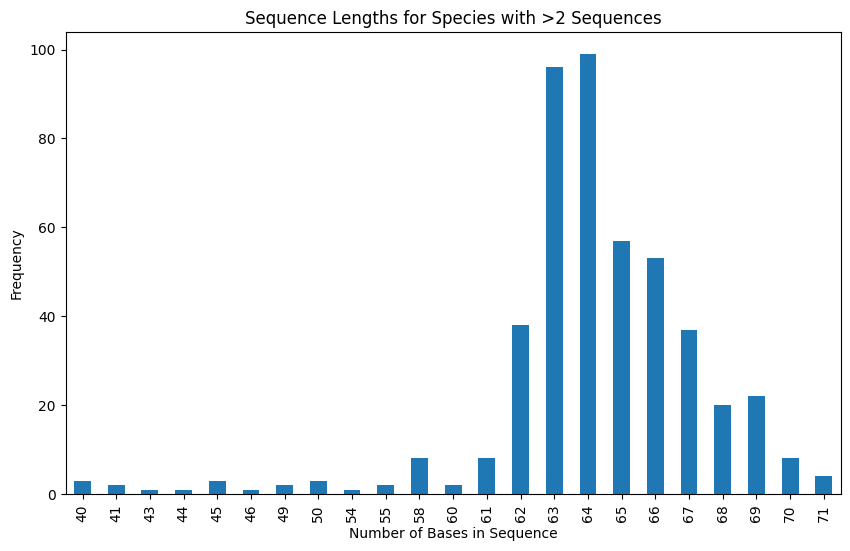

In [ ]:
overall_df = pd.read_csv('datasets/v4_combined_reference_sequences.csv', sep=';')
overall_df = utils.remove_species_with_too_few_sequences(
            overall_df, 'species_cat', 2, False
        )
overall_df['seq_length'] = overall_df['seq'].str.len()
print(f"MEAN: {overall_df['seq_length'].mean()}")

plt.figure(figsize=(10,6))
overall_df['seq_length'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Number of Bases in Sequence')
plt.ylabel('Frequency')
plt.title('Sequence Lengths for Species with >2 Sequences')
plt.show()

In [ ]:
df = pd.read_csv('results.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_sorted = df.sort_values(['val_macro_f1-score', 'val_micro_accuracy'], ascending=False)
# df_sorted.to_csv('results.csv', index=False)
df = df_sorted
df = df[df['k_iters'] >= 5]
df.head(1000)

val_macro_f1-score  val_macro_recall  val_micro_accuracy  \
0               1.000000          1.000000            0.980800   
1               1.000000          1.000000            0.978644   
2               1.000000          1.000000            0.977603   
3               1.000000          1.000000            0.977586   
4               1.000000          1.000000            0.977574   
5               1.000000          1.000000            0.976510   
6               1.000000          1.000000            0.976505   
7               1.000000          1.000000            0.976499   
8               1.000000          1.000000            0.974371   
9               1.000000          1.000000            0.974360   
10              1.000000          1.000000            0.973308   
11              1.000000          1.000000            0.972255   
12              1.000000          1.000000            0.972244   
13              1.000000          1.000000            0.972232   
14              1.000000          1.000000            0.972232   
15              1.000000          1.000000            0.972221   
16              1.000000          1.000000            0.971180   
17              1.000000          1.000000            0.971174   
18              1.000000          1.000000            0.971174   
19              1.000000          1.000000            0.971174   
20              1.000000          1.000000            0.971174   
21              1.000000          1.000000            0.971174   
22              1.000000          1.000000            0.971169   
23              1.000000          1.000000            0.971157   
24              1.000000          1.000000            0.970116   
25              1.000000          1.000000            0.970110   
26              1.000000          1.000000            0.970110   
27              1.000000          1.000000            0.970099   
28              1.000000          1.000000            0.970099   
29              1.000000          1.000000            0.970099   
30              1.000000          1.000000            0.970093   
31              1.000000          1.000000            0.970093   
32              1.000000          1.000000            0.969047   
33              1.000000          1.000000            0.969035   
34              1.000000          1.000000            0.969035   
35              1.000000          1.000000            0.969029   
36              1.000000          1.000000            0.969029   
37              1.000000          1.000000            0.969029   
38              1.000000          1.000000            0.969024   
39              1.000000          1.000000            0.969024   
40              1.000000          1.000000            0.969024   
41              1.000000          1.000000            0.967977   
42              1.000000          1.000000            0.967971   
43              1.000000          1.000000            0.967966   
44              1.000000          1.000000            0.967966   
45              1.000000          1.000000            0.967966   
46              1.000000          1.000000            0.967966   
47              1.000000          1.000000            0.967960   
48              1.000000          1.000000            0.967954   
49              1.000000          1.000000            0.967954   
50              1.000000          1.000000            0.967943   
51              1.000000          1.000000            0.966907   
52              1.000000          1.000000            0.966907   
53              1.000000          1.000000            0.966902   
54              1.000000          1.000000            0.966896   
55              1.000000          1.000000            0.966890   
56              1.000000          1.000000            0.966885   
57              1.000000          1.000000            0.966885   
58              1.000000          1.000000            0.966879   
59              1.000000          1.000000    

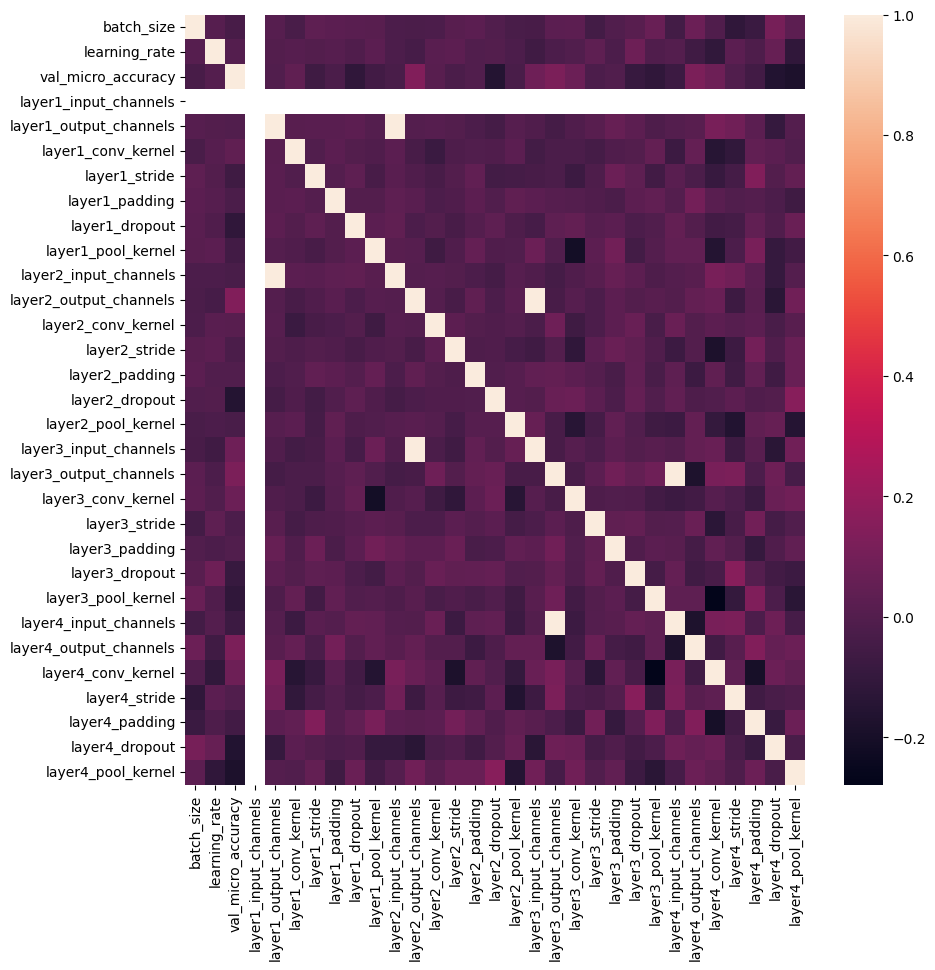

In [ ]:
# Not useful since it doesn't relate the combinations to accuracy, only to each other
# Select the columns
columns = ['batch_size', 'learning_rate', 'val_micro_accuracy']
for i in range(1, 5):
    columns.extend([f'layer{i}_input_channels', f'layer{i}_output_channels', f'layer{i}_conv_kernel', f'layer{i}_stride', f'layer{i}_padding', f'layer{i}_dropout', f'layer{i}_pool_kernel'])

df_selected = df[columns]

# Calculate the correlation matrix
corr = df_selected.corr()

# Create a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=False, fmt=".2f")

# Display the plot
plt.show()

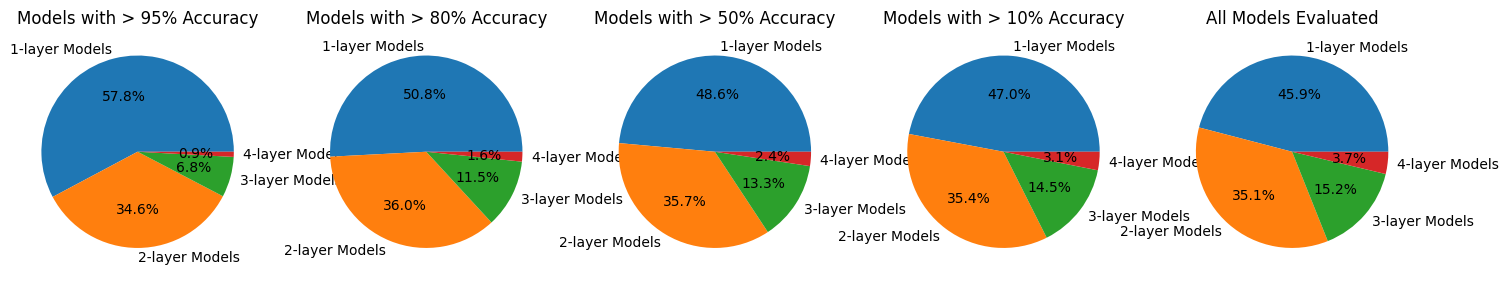

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame based on the accuracy
df_95 = df[df['val_micro_accuracy'] > 0.95]
df_80 = df[df['val_micro_accuracy'] > 0.80]
df_50 = df[df['val_micro_accuracy'] > 0.50]
df_10 = df[df['val_micro_accuracy'] > 0.10]
df_00 = df[df['val_micro_accuracy'] > 0.00]

# Calculate the percentages for each filtered DataFrame
nan_95_percent = [(1 - df_95['layer{}_input_channels'.format(i)].isna().mean())*100 for i in range(1, 5)]
nan_80_percent = [(1 - df_80['layer{}_input_channels'.format(i)].isna().mean())*100 for i in range(1, 5)]
nan_50_percent = [(1 - df_50['layer{}_input_channels'.format(i)].isna().mean())*100 for i in range(1, 5)]
nan_10_percent = [(1 - df_10['layer{}_input_channels'.format(i)].isna().mean())*100 for i in range(1, 5)]
nan_00_percent = [(1 - df_00['layer{}_input_channels'.format(i)].isna().mean())*100 for i in range(1, 5)]

# Create labels
labels = ['1-layer Models', '2-layer Models', '3-layer Models', '4-layer Models']

# Create the pie charts
fig, axs = plt.subplots(1, 5, figsize=(18, 6))

# 95% accuracy
axs[0].pie(nan_95_percent, labels=labels, autopct='%1.1f%%')
axs[0].set_title('Models with > 95% Accuracy')

# 80% accuracy
axs[1].pie(nan_80_percent, labels=labels, autopct='%1.1f%%')
axs[1].set_title('Models with > 80% Accuracy')

# 50% accuracy
axs[2].pie(nan_50_percent, labels=labels, autopct='%1.1f%%')
axs[2].set_title('Models with > 50% Accuracy')

# 10% accuracy
axs[3].pie(nan_10_percent, labels=labels, autopct='%1.1f%%')
axs[3].set_title('Models with > 10% Accuracy')

# all explored models
axs[4].pie(nan_00_percent, labels=labels, autopct='%1.1f%%')
axs[4].set_title('All Models Evaluated')

plt.show()

C:\Users\Sam\AppData\Local\Temp\ipykernel_11060\2231353246.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg = df.groupby(['batch_size', 'learning_rate']).mean().reset_index()
C:\Users\Sam\AppData\Local\Temp\ipykernel_11060\2231353246.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = df_agg.pivot('batch_size', 'learning_rate', 'val_micro_accuracy')


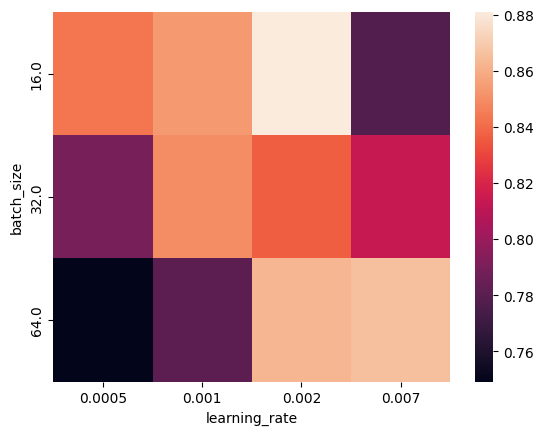

In [ ]:
df_agg = df.groupby(['batch_size', 'learning_rate']).mean().reset_index()
pivot_table = df_agg.pivot('batch_size', 'learning_rate', 'val_micro_accuracy')
sns.heatmap(pivot_table)
plt.show()

C:\Users\Sam\AppData\Local\Temp\ipykernel_11060\2964924092.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg = df.groupby(['layer1_input_channels', 'layer1_output_channels']).mean().reset_index()
C:\Users\Sam\AppData\Local\Temp\ipykernel_11060\2964924092.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = df_agg.pivot('layer1_input_channels', 'layer1_output_channels', 'val_micro_accuracy')


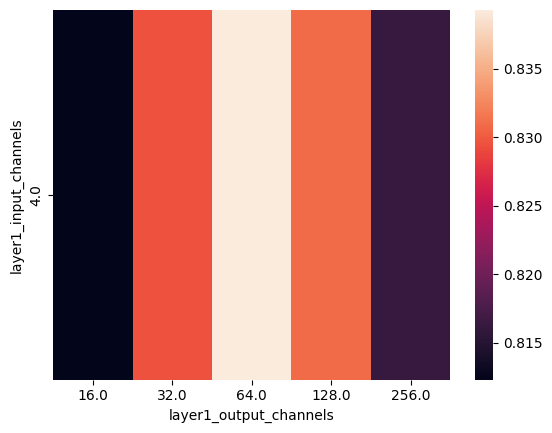

In [ ]:
df_agg = df.groupby(['layer1_input_channels', 'layer1_output_channels']).mean().reset_index()
pivot_table = df_agg.pivot('layer1_input_channels', 'layer1_output_channels', 'val_micro_accuracy')
sns.heatmap(pivot_table)
plt.show()

C:\Users\Sam\AppData\Local\Temp\ipykernel_11060\2657535664.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg = df.groupby(['layer2_input_channels', 'layer2_output_channels']).mean().reset_index()
C:\Users\Sam\AppData\Local\Temp\ipykernel_11060\2657535664.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = df_agg.pivot('layer2_input_channels', 'layer2_output_channels', 'val_micro_accuracy')


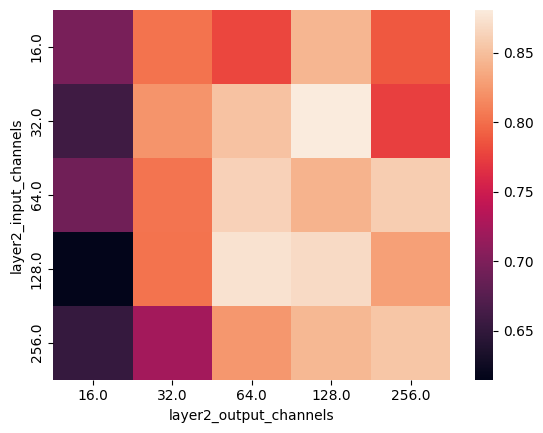

In [ ]:
df_agg = df.groupby(['layer2_input_channels', 'layer2_output_channels']).mean().reset_index()
pivot_table = df_agg.pivot('layer2_input_channels', 'layer2_output_channels', 'val_micro_accuracy')
sns.heatmap(pivot_table)
plt.show()

C:\Users\Sam\AppData\Local\Temp\ipykernel_11060\3544496150.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg = df.groupby(['layer3_input_channels', 'layer3_output_channels']).mean().reset_index()
C:\Users\Sam\AppData\Local\Temp\ipykernel_11060\3544496150.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = df_agg.pivot('layer3_input_channels', 'layer3_output_channels', 'val_micro_accuracy')


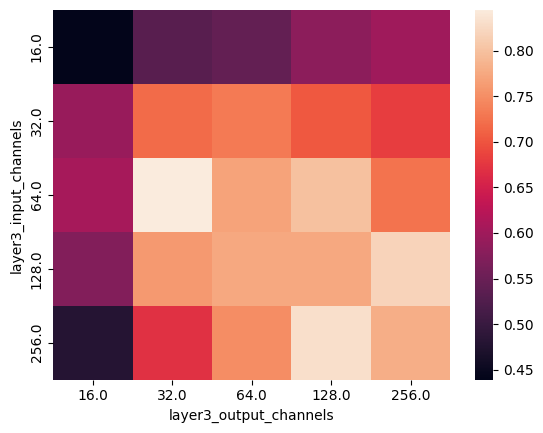

In [ ]:
df_agg = df.groupby(['layer3_input_channels', 'layer3_output_channels']).mean().reset_index()
pivot_table = df_agg.pivot('layer3_input_channels', 'layer3_output_channels', 'val_micro_accuracy')
sns.heatmap(pivot_table)
plt.show()

C:\Users\Sam\AppData\Local\Temp\ipykernel_11060\262091021.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg = df.groupby(['layer4_input_channels', 'layer4_output_channels']).mean().reset_index()
C:\Users\Sam\AppData\Local\Temp\ipykernel_11060\262091021.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = df_agg.pivot('layer4_input_channels', 'layer4_output_channels', 'val_micro_accuracy')


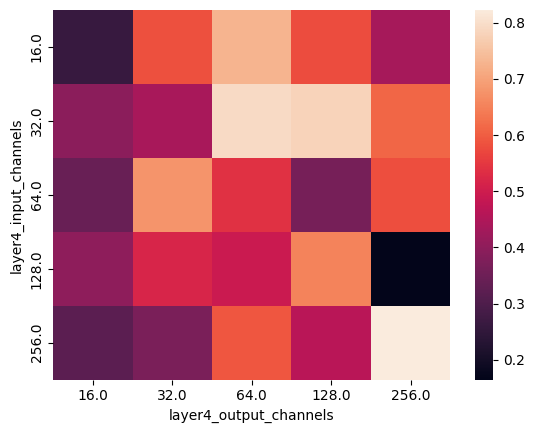

In [ ]:
df_agg = df.groupby(['layer4_input_channels', 'layer4_output_channels']).mean().reset_index()
pivot_table = df_agg.pivot('layer4_input_channels', 'layer4_output_channels', 'val_micro_accuracy')
sns.heatmap(pivot_table)
plt.show()

In [ ]:
df_agg = df.groupby(['layer1_conv_kernel', 'layer1_conv_kernel']).mean().reset_index()
pivot_table = df_agg.pivot('layer1_conv_kernel', 'layer1_conv_kernel', 'val_micro_accuracy')
sns.heatmap(pivot_table)
plt.show()

C:\Users\Sam\AppData\Local\Temp\ipykernel_11060\3647119536.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg = df.groupby(['layer1_conv_kernel', 'layer1_conv_kernel']).mean().reset_index()


ValueError: cannot insert layer1_conv_kernel, already exists

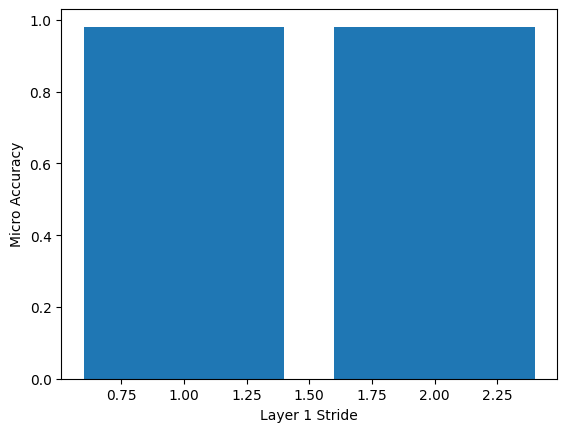

In [ ]:
plt.bar(df['layer1_stride'], df['val_micro_accuracy'])
plt.xlabel('Layer 1 Stride')
plt.ylabel('Micro Accuracy')
plt.show()

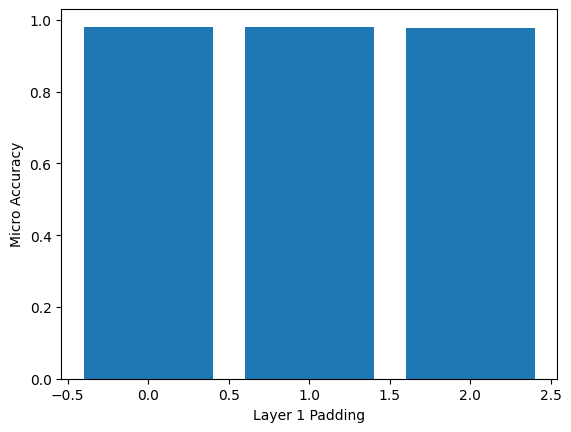

In [ ]:
plt.bar(df['layer1_padding'], df['val_micro_accuracy'])
plt.xlabel('Layer 1 Padding')
plt.ylabel('Micro Accuracy')
plt.show()

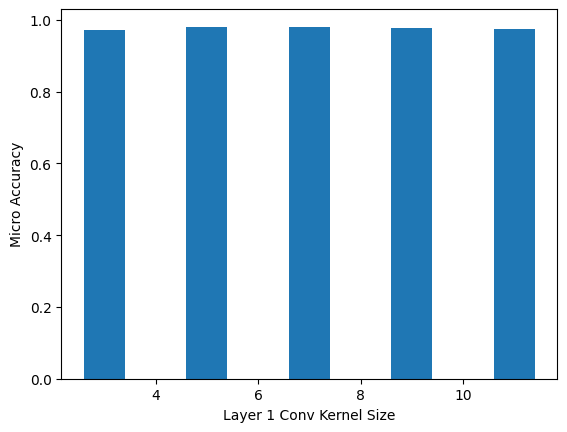

In [ ]:
plt.bar(df['layer1_conv_kernel'], df['val_micro_accuracy'])
plt.xlabel('Layer 1 Conv Kernel Size')
plt.ylabel('Micro Accuracy')
plt.show()

In [ ]:
df_agg = df.groupby(['layer1_input_channels', 'layer1_conv_kernel']).mean().reset_index()
pivot_table = df_agg.pivot('layer1_input_channels', 'layer1_conv_kernel', 'val_micro_accuracy')
sns.heatmap(pivot_table)
plt.show()

layer1_input_channels	layer1_output_channels	layer1_conv_kernel	layer1_stride	layer1_padding	layer1_dropout	layer1_pool_kernel

SyntaxError: invalid syntax (2131687882.py, line 6)